In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

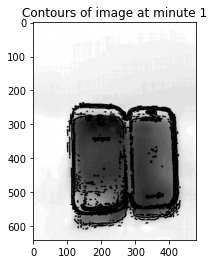

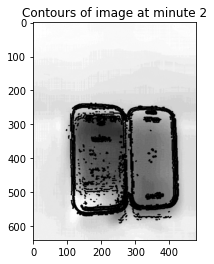

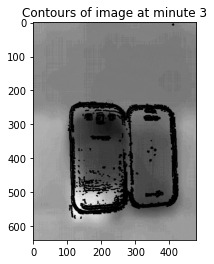

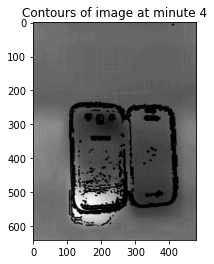

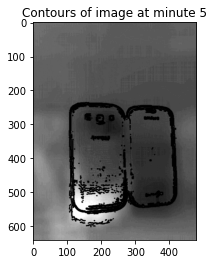

In [60]:
filenames = [
    'Youtube/results/1636825686724-blended.png',
    'Youtube/results/1636825750092-blended.png',
    'Youtube/results/1636825812911-blended.png',
    'Youtube/results/1636825875516-blended.png',
    'Youtube/results/1636825917376-blended.png'
]
i = 1
plt.figure()
for file in filenames:
    f, axis = plt.subplots() 
    img_gray = cv2.imread(file,0)
    blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    thresh = cv2.Canny(blur, 40, 45)
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    image_copy = img_gray.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    plt.title(f'Contours of image at minute {i}')
    plt.imshow(image_copy, cmap='gray')
#     cv2.imwrite(f'exported_images/youtube_blended_minute_{i}.png', image_copy)
    i += 1
    

In [67]:
import imutils
import cv2
def is_contour_bad(c):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # the contour is 'bad' if it is not a rectangle
    return not len(approx) == 4

image = cv2.imread(filenames[3])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 100)
cv2.imshow("Original", image)
# find contours in the image and initialize the mask that will be
# used to remove the bad contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
mask = np.ones(image.shape[:2], dtype="uint8") * 255
# loop over the contours
for c in cnts:
    # if the contour is bad, draw it on the mask
    if is_contour_bad(c):
        cv2.drawContours(mask, [c], -1, 0, -1)
# remove the contours from the image and show the resulting images
image = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Mask", mask)
cv2.imshow("After", image)
cv2.waitKey(0)

-1

In [74]:
import cv2
import numpy as np


# load image as grayscale
img = cv2.imread(filenames[4])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of result
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imshow('retina_masked.png', result)
cv2.waitKey(0)
# plt.imshow(result, cmap='gray')

-1

In [42]:
import cv2
import numpy as np

## (1) Read
img = cv2.imread(filenames[3])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) Find the min-area contour
_cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(cnts, key=cv2.contourArea)
for cnt in cnts:
    if cv2.contourArea(cnt) > 100:
        break

## (4) Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)

## Save it
cv2.imshow("dst.png", dst)
cv2.waitKey(0)

-1

In [4]:
import cv2

# Load iamge, grayscale, adaptive threshold
image = cv2.imread(filenames[3])
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,150,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,51,9)

# Fill rectangular contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (255,255,255), -1)

# Morph open
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)

# Draw rectangles
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)

cv2.imshow('thresh', thresh)
cv2.imshow('opening', opening)
cv2.imshow('image', image)
cv2.waitKey()

-1

In [11]:
import cv2

image= cv2.imread(filenames[3])
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 0,255)


contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)


i = 0
for (i,c) in enumerate(sorted_contours):
    x,y,w,h= cv2.boundingRect(c)
    
    cropped_contour= original_image[y:y+h, x:x+w]
    image_name= "output_shape_number_" + str(i+1) + ".jpg"
    cv2.imwrite(image_name, cropped_contour)
    readimage= cv2.imread(image_name)
    cv2.imshow('Image', readimage)
    cv2.waitKey(0)
    if i == 4:
        break
    i+=1
    
    
cv2.destroyAllWindows()

-1

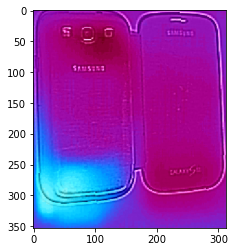

In [60]:
# GOOD
import cv2

# Load image, convert to grayscale, and find edges
image = cv2.imread(filenames[3])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# Find contour and sort by contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    break

plt.imshow(ROI, cmap='gray')
cv2.imwrite('ROI.png',ROI)
cv2.waitKey()

-1

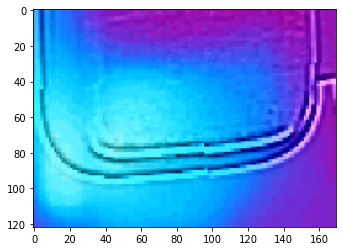

In [48]:
# GOOD
import cv2

# Load image, convert to grayscale, and find edges
image = cv2.imread('ROI.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 179, 255,cv2.THRESH_BINARY)[1]

# Find contour and sort by contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    break

plt.imshow(ROI)
cv2.imwrite('ROI2.png',ROI)
cv2.waitKey()

In [51]:
# GOOD
import cv2

# Load image, convert to grayscale, and find edges
image = cv2.imread('ROI2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 170, 255,cv2.THRESH_BINARY)[1]

# Find contour and sort by contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea)

# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    break

# plt.imshow(ROI)
cv2.imshow('ROI2.png',ROI)
cv2.waitKey()

-1

In [53]:
import cv2
import numpy as np

## (1) Read
img = cv2.imread("ROI2.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

## (3) Find the min-area contour
_cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(cnts, key=cv2.contourArea)
for cnt in cnts:
    if cv2.contourArea(cnt) > 100:
        break

## (4) Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)


## Save it
# cv2.imshow("test", holes)
cv2.imwrite("dst.png", dst)

cv2.waitKey(0)

-1

In [80]:
import cv2
 
img = cv2.imread(filenames[3], cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (384, 288, 4)


In [79]:
# load image as grayscale
img = cv2.imread('ROI2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of result
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask
result = cv2.bitwise_and(result, result, mask=mask)
cv2.imshow('mask', mask)
# save resulting masked image
cv2.imshow('retina_masked.png', result)
cv2.waitKey()

-1